# Module 2, Lab 2 - Non-Linear Regression

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Differnt types of linear regression

### Simple Linear

$$ y = ax + b $$

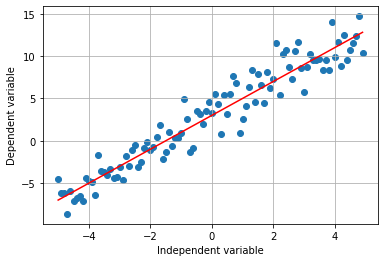

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*x + 3
y_noise = 2* np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

### Polynomial

Example of a $3^{rd}$ order ploynomial

$$ y = ax^3 + bx^2 + cx + d $$

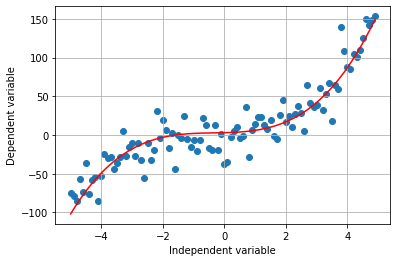

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()


### Quadratic

$$ y = x^2 $$

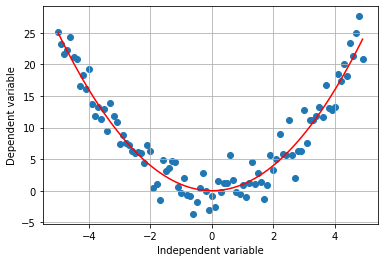

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

# y = x ** 2
y = np.power(x, 2)
y_noise = 2 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

### Exponential

$$ y = a + bc^x $$

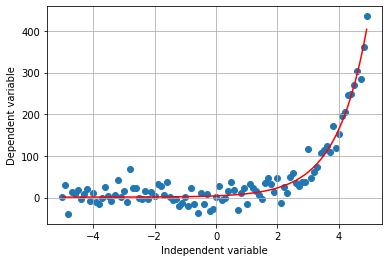

In [15]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1 + 2*1.5*np.exp(x)
y_noise = 20 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

### Logaritmic

$$ y = log(x) $$

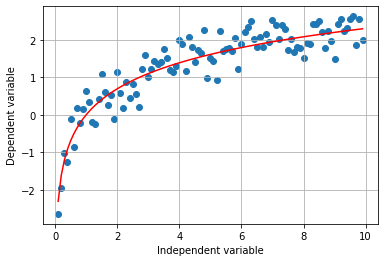

In [24]:
x = np.arange(0.1, 10.0, 0.1)

y = np.log(x)
y_noise = 0.4 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

### Sigmoidal/Logistic

$$ y = a + \frac{b}{1  + c^{(x-d)}} $$

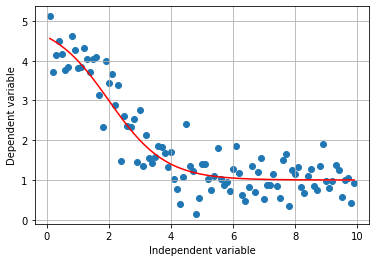

In [26]:
x = np.arange(0.1, 10.0, 0.1)

y = 1 + 4/(1 + np.power(3, x-2)) # a = 1, b = 4. c = 3, d = 2
y_noise = 0.4 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()